# Extract Borough/Neighborhood Data

Import Libraries

In [1]:
import numpy as np 
import requests
import pandas as pd 
import json

Download Dataset

In [2]:
json_url = 'https://cocl.us/new_york_dataset/nyu_2451_34572-geojson.json'
j = requests.get(url=json_url)

In [3]:
content = json.loads(j.content)
content

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
d = content['features']
d

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

Transform data into pandas dataframe

In [5]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in d:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


# Extract Foursquare Data

Define Foursquare Credentials

In [12]:
CLIENT_ID = '0YCWNXUV5UIX305IRE4RIW05RWR2WC2YOWFMJ32XKFIDAMBZ' # your Foursquare ID
CLIENT_SECRET = 'LQASSNWI0LULP0YL03NFY11ZQ504XY53YBBP5SULXTLRB4T0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 
radius = 500 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0YCWNXUV5UIX305IRE4RIW05RWR2WC2YOWFMJ32XKFIDAMBZ
CLIENT_SECRET:LQASSNWI0LULP0YL03NFY11ZQ504XY53YBBP5SULXTLRB4T0


Explore first neighborhood

In [13]:
neighborhoods.loc[0, 'Neighborhood']
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [14]:
LIMIT = 100 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0YCWNXUV5UIX305IRE4RIW05RWR2WC2YOWFMJ32XKFIDAMBZ&client_secret=LQASSNWI0LULP0YL03NFY11ZQ504XY53YBBP5SULXTLRB4T0&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ca77cbddb04f507fb0630ce'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
from pandas.io.json import json_normalize

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Cooler Runnings Jamaican Restaurant Inc,Caribbean Restaurant,40.898276,-73.850381
3,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
4,SUBWAY,Sandwich Place,40.890656,-73.849192


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


For each of the 306 neighborhoods, get top 100 venues within a 500 meter radius 

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)


In [29]:
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Find data frame size

In [30]:
print(nyc_venues.shape)
nyc_venues.head()


(10295, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898276,-73.850381,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,SUBWAY,40.890656,-73.849192,Sandwich Place


Find number of venues per neighborhood

In [31]:
nyc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,27,27,27,27,27,27
Annadale,12,12,12,12,12,12
Arden Heights,5,5,5,5,5,5
Arlington,6,6,6,6,6,6
Arrochar,19,19,19,19,19,19
Arverne,18,18,18,18,18,18
Astoria,100,100,100,100,100,100
Astoria Heights,11,11,11,11,11,11
Auburndale,18,18,18,18,18,18


Find number of unique categories

In [32]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 429 uniques categories.


In [113]:
types = nyc_venues['Venue Category'].unique()
types

array(['Dessert Shop', 'Pharmacy', 'Caribbean Restaurant',
       'Ice Cream Shop', 'Sandwich Place', 'Donut Shop', 'Food Truck',
       'Laundromat', 'Pizza Place', 'Discount Store', 'Mattress Store',
       'Fast Food Restaurant', 'Grocery Store', 'Restaurant',
       'Bus Station', 'Baseball Field', 'Salon / Barbershop', 'Gift Shop',
       'Trail', 'Basketball Court', 'Park', 'Accessories Store', 'Diner',
       'Seafood Restaurant', 'Deli / Bodega', 'Bowling Alley', 'Bus Stop',
       'Automotive Shop', 'Platform', 'Metro Station',
       'Convenience Store', 'Juice Bar', 'Chinese Restaurant',
       'Cosmetics Shop', 'Plaza', 'River', 'Playground', 'Bank',
       'Home Service', 'Gym', 'Gourmet Shop', 'Latin American Restaurant',
       'Pub', 'Burger Joint', 'Beer Bar', 'Warehouse Store',
       'Mexican Restaurant', 'Bar', 'Coffee Shop', 'Spanish Restaurant',
       'Wings Joint', 'Thrift / Vintage Store', 'Bakery', 'Supermarket',
       'Candy Store', 'Rental Car Location', 'B

Tag Restaurants, Offices, Transportation Services, Retail, Bar/Nightclub, Hotel/Residential, Entertainment

In [162]:
restaurant_types = ['Dessert Shop', 'Ice Cream Shop', 'Caribbean Restaurant',
       'Sandwich Place', 'Donut Shop', 'Food Truck',
       'Pizza Place', 'Fast Food Restaurant', 'Restaurant', 'Diner',
       'Seafood Restaurant', 'Deli / Bodega', 'Chinese Restaurant', 'Gourmet Shop', 'Latin American Restaurant',
       'Burger Joint', 'Mexican Restaurant', 'Spanish Restaurant',
       'Wings Joint', 'Breakfast Spot', 'Café',
       'Fried Chicken Joint', 'Vegetarian / Vegan Restaurant', 'Steakhouse', 'American Restaurant', 'Mobile Phone Shop',
       'Soup Place', 'Sushi Restaurant', 'French Restaurant',
       'African Restaurant', 'Greek Restaurant', 'Paella Restaurant', 'Peruvian Restaurant',
       'BBQ Joint', 'South American Restaurant', 'Asian Restaurant', 'Middle Eastern Restaurant', 'Arepa Restaurant', 
       'Buffet', 'Mediterranean Restaurant', 'Japanese Restaurant', 'Thai Restaurant', 'Comfort Food Restaurant',
       'Taco Place', 'Caucasian Restaurant', 'New American Restaurant', 'Vietnamese Restaurant', 
       'Dim Sum Restaurant', 'Noodle House', 'Shabu-Shabu Restaurant',
       'Hotpot Restaurant', 'Russian Restaurant', 'Dumpling Restaurant',
       'Halal Restaurant', 'Polish Restaurant', 'Falafel Restaurant', 'Ramen Restaurant',
       'Korean Restaurant', 'Eastern European Restaurant', 'Varenyky restaurant', 
       'Turkish Restaurant', 'Cajun / Creole Restaurant', 'Southern / Soul Food Restaurant',
       'North Indian Restaurant', 'Tapas Restaurant', 'Cuban Restaurant', 'Pakistani Restaurant', 'Bistro', 'Burrito Place', 'Salad Place',
       'Ethiopian Restaurant', 'Argentinian Restaurant', 'Israeli Restaurant',
       'German Restaurant','Cantonese Restaurant', 'Hot Dog Joint',
       'Shanghai Restaurant', 'Kebab Restaurant',
       'Hawaiian Restaurant', 'Pedestrian Plaza',
       'Taiwanese Restaurant', 'Lebanese Restaurant',
       'English Restaurant', 'Malay Restaurant',
       'Austrian Restaurant', 'Japanese Curry Restaurant', 'Czech Restaurant',
       'Afghan Restaurant', 'Australian Restaurant', 'Szechuan Restaurant',
       'Brazilian Restaurant', 'Jewish Restaurant', 'Udon Restaurant',
       'Moroccan Restaurant', 'Swiss Restaurant', 'Modern European Restaurant', 'South Indian Restaurant', 'Tibetan Restaurant',
       'Himalayan Restaurant', 'Empanada Restaurant',  'Colombian Restaurant', 'Indonesian Restaurant', 'Romanian Restaurant',
       'Egyptian Restaurant', 'Kosher Restaurant', 'Gluten-free Restaurant',
       'Sri Lankan Restaurant', 'Tex-Mex Restaurant','Venezuelan Restaurant',
       'Molecular Gastronomy Restaurant', 'Cambodian Restaurant','Soba Restaurant', 'Portuguese Restaurant']

In [142]:
office_types = ['Bank', 'Home Service', 'Gym', 'Eye Doctor', 'Check Cashing Service', 'Building', 'Film Studio',
       'Bookstore','Laundry Service', 'Beach', 'Non-Profit', 'Daycare',
       'Health & Beauty Service','Construction & Landscaping', 'Optical Shop',
       'IT Services', 'Coworking Space', 'Event Service', 'Office',
       'School', 'Daycare', 'High School', 'General College & University', 
        'Lawyer', 'Business Service', 'Pet Service', 'Lawyer',
       'Rental Service', 'Post Office', 'Tourist Information Center', 'Insurance Office', 
        'Financial or Legal Service', 'Child Care Service', 'Medical Center',
       'Spiritual Center', 'Tech Startup', 'Factory']

In [143]:
transportation_types = ['Bus Station', 'Trail', 'Bus Stop',
       'Platform', 'Metro Station','Rental Car Location', 
       'Train Station', 'Airport Tram', 'Train', 'Boat or Ferry',
       'Intersection', 'Road', 'Airport Terminal', 'Bus Line', 
       'Bike Trail', 'Bike Rental / Bike Share', 'Bridge', 'Heliport']

In [174]:
retail_types = ['Pharmacy', 'Laundromat', 'Discount Store', 'Mattress Store',
       'Grocery Store', 'Salon / Barbershop', 'Gift Shop', 
       'Accessories Store', 'Automotive Shop', 'Convenience Store', 
       'Cosmetics Shop', 'Home Service',  'Warehouse Store',
       'Thrift / Vintage Store', 'Bakery', 'Supermarket',
       'Candy Store', 'Rental Car Location', 'Video Store',
       'Shipping Store', 'Supplement Shop', 'Pet Store', 'Video Game Store',
       'Department Store', 'Big Box Store', 'Mobile Phone Shop',
       "Men's Store", 'Electronics Store', 'Flower Shop',
       'Smoke Shop', 'Dry Cleaner', 'Check Cashing Service', 'Clothing Store', 'Sporting Goods Shop',
       'Miscellaneous Shop', 'Kids Store', 'Outlet Store',
       "Women's Store", 'Market', 'Paper / Office Supplies Store', 'Furniture / Home Store','Flea Market',
       'Bookstore', 'Toy / Game Store', 'Boutique',
       'Butcher', 'Antique Shop', 'Jewelry Store', 'Chocolate Shop',      
       'Comic Shop', 'Herbs & Spices Store', 'Hardware Store', 
        'Motorcycle Shop', 'Tailor Shop', 'Health Food Store', 
       'Adult Boutique', 'Board Shop', 'Bike Shop', 'Beer Store', 
       'Bridal Shop', 'Hobby Shop', 'Drugstore', 'Liquor Store',
       'College Bookstore', 'Tanning Salon',  'Camera Store', 'Leather Goods Store']

In [145]:
hotel_types = [ 'Hotel',  'Neighborhood', 'Residential Building (Apartment / Condo)', 
       'Resort',  'Motel', 'Bed & Breakfast', 'Campground', 'Hotel Pool']

In [146]:
bar_types = ['Pub', 'Nightclub', 'Brewery', 'Hookah Bar', 'Dive Bar','Gastropub',
       'Cocktail Bar', 'Vape Store', 'Whisky Bar','Karaoke Bar', 'Tiki Bar',
       'Wine Bar', 'Jazz Club', 'Other Nightlife', 'Rock Club','Beer Garden',
       'Gay Bar', 'Sake Bar', 'Hotel Bar', 'Irish Pub']

In [147]:
entertainment_types = [ 'Basketball Court', 'Park', 'Bowling Alley', 'Plaza', 'River', 'Playground', 'Gym', 
       'Outdoor Sculpture', 'Arcade', 'Music Venue', 
       'History Museum', 'Art Gallery', 'Harbor / Marina',
       'Historic Site', 'Scenic Lookout', 'Community Center', 
       'Indie Theater', 'Social Club', 'Beach',
       'Dance Studio',  'Museum', 'Outdoors & Recreation',
       'Racetrack', 'Garden', 'Cycle Studio',
       'Pilates Studio', 'Waterfront', 
       'Indie Movie Theater',  'Gaming Cafe', 'Dog Run', 'Tennis Court', 
       'Lake', 'Baseball Stadium', 'Skating Rink', 'Monument / Landmark',
       'Theme Park Ride / Attraction', 'Surf Spot',
       'Golf Course', 'Sculpture Garden', 'Boxing Gym',  'Movie Theater',
       'Roof Deck', 'Concert Hall', 'Pedestrian Plaza',
       'Library', 'General Entertainment', 
       'Climbing Gym', 'Public Art', 'Exhibit', 'Street Art', 'Fountain', 
       'Circus', 'Comedy Club', 'Rock Climbing Spot', 'Cultural Center', 
       'College Theater', 'Photography Studio','Pet Café',
       'Gym Pool', 'Mini Golf', 'Volleyball Court', 'Skate Park',  'Memorial Site',
       'Auditorium', 'Indoor Play Area', 'College Basketball Court', 'College Stadium',
       'Tourist Information Center', 'Botanical Garden','Roller Rink', 'Science Museum', 'Campground']

In [163]:
def f(row):
    val = 0
    for index in restaurant_types:
        if row['Venue Category'] == index:
            val = 1
    return val

In [164]:
nyc_venues['Restaurant'] = nyc_venues.apply(f, axis=1)

In [150]:
def f(row):
    val = 0
    for index in office_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Office'] = nyc_venues.apply(f, axis=1)

In [151]:
def f(row):
    val = 0
    for index in transportation_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Transportation'] = nyc_venues.apply(f, axis=1)

In [175]:
def f(row):
    val = 0
    for index in retail_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Retail'] = nyc_venues.apply(f, axis=1)

In [153]:
def f(row):
    val = 0
    for index in hotel_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Residential/Hotel'] = nyc_venues.apply(f, axis=1)

In [154]:
def f(row):
    val = 0
    for index in bar_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Nightlife'] = nyc_venues.apply(f, axis=1)

In [155]:
def f(row):
    val = 0
    for index in entertainment_types:
        if row['Venue Category'] == index:
            val = 1
    return val
nyc_venues['Other Entertainment'] = nyc_venues.apply(f, axis=1)

In [156]:
def v(row):
    val = 0
    if row['Venue Category'] == 'Vegetarian / Vegan Restaurant':
        val = 1
    return val

In [165]:
nyc_venues['Vegetarian'] = nyc_venues.apply(v, axis=1)

In [219]:
def v(row):
    val = 1
    return val
nyc_venues['Venues'] = nyc_venues.apply(v, axis=1)

In [220]:
nyc_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurant,Vegetarian,Office,Transportation,Retail,Residential/Hotel,Nightlife,Other Entertainment,Venues
0,Wakefield,40.894705,-73.847201,1,40.894123,-73.845892,Dessert Shop,1,0,0,0,0,0,0,0,1
1,Wakefield,40.894705,-73.847201,1,40.896649,-73.844846,Pharmacy,0,0,0,0,1,0,0,0,1
2,Wakefield,40.894705,-73.847201,1,40.898276,-73.850381,Caribbean Restaurant,1,0,0,0,0,0,0,0,1
3,Wakefield,40.894705,-73.847201,1,40.890487,-73.848568,Ice Cream Shop,1,0,0,0,0,0,0,0,1
4,Wakefield,40.894705,-73.847201,1,40.890656,-73.849192,Sandwich Place,1,0,0,0,0,0,0,0,1


In [221]:
nyc_restaurants = nyc_venues.loc[nyc_venues['Restaurant'] == 1]

In [222]:
nyc_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurant,Vegetarian,Office,Transportation,Retail,Residential/Hotel,Nightlife,Other Entertainment,Venues
0,Wakefield,40.894705,-73.847201,1,40.894123,-73.845892,Dessert Shop,1,0,0,0,0,0,0,0,1
2,Wakefield,40.894705,-73.847201,1,40.898276,-73.850381,Caribbean Restaurant,1,0,0,0,0,0,0,0,1
3,Wakefield,40.894705,-73.847201,1,40.890487,-73.848568,Ice Cream Shop,1,0,0,0,0,0,0,0,1
4,Wakefield,40.894705,-73.847201,1,40.890656,-73.849192,Sandwich Place,1,0,0,0,0,0,0,0,1
5,Wakefield,40.894705,-73.847201,1,40.890459,-73.849089,Donut Shop,1,0,0,0,0,0,0,0,1
6,Wakefield,40.894705,-73.847201,1,40.892293,-73.843230,Food Truck,1,0,0,0,0,0,0,0,1
8,Co-op City,40.874294,-73.829939,1,40.876374,-73.829940,Pizza Place,1,0,0,0,0,0,0,0,1
11,Co-op City,40.874294,-73.829939,1,40.870045,-73.829578,Ice Cream Shop,1,0,0,0,0,0,0,0,1
13,Co-op City,40.874294,-73.829939,1,40.870411,-73.828606,Fast Food Restaurant,1,0,0,0,0,0,0,0,1
15,Co-op City,40.874294,-73.829939,1,40.876086,-73.828868,Restaurant,1,0,0,0,0,0,0,0,1


In [223]:
nyc_restaurants.shape

(4256, 16)

Find total venues by neighborhood

In [224]:
nyc_grouped = nyc_venues.groupby('Neighborhood').sum().reset_index()
nyc_grouped

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Restaurant,Vegetarian,Office,Transportation,Retail,Residential/Hotel,Nightlife,Other Entertainment,Venues
0,Allerton,1103.376273,-1994.201603,27,1103.353283,-1994.194654,13,0,0,2,7,0,0,1,27
1,Annadale,486.457370,-890.142584,12,486.490675,-890.132327,7,0,0,1,1,0,0,1,12
2,Arden Heights,202.746429,-370.929434,5,202.754010,-370.927751,1,0,0,0,1,0,0,1,5
3,Arlington,243.811951,-444.990625,6,243.816658,-444.990070,2,0,0,3,1,0,0,0,6
4,Arrochar,771.329939,-1407.275349,19,771.315453,-1407.251923,8,0,0,2,3,1,0,1,19
5,Arverne,730.604591,-1328.255862,18,730.619367,-1328.311190,4,0,2,3,1,1,0,6,18
6,Astoria,4076.850859,-7391.565374,100,4076.672508,-7391.660925,47,1,4,0,9,0,10,3,100
7,Astoria Heights,448.473491,-812.841480,11,448.474952,-812.835890,2,0,0,1,2,0,0,3,11
8,Auburndale,733.711132,-1328.251724,18,733.695453,-1328.229649,6,0,0,1,8,0,1,0,18
9,Bath Beach,1948.776898,-3551.940106,48,1948.833978,-3551.882964,25,0,0,2,13,0,1,2,48


In [225]:
nyc_grouped.shape

(301, 15)

Merge total venues by neighborhood (nyc_grouped) to restraunt (nyc_restaurants) dataset

In [236]:
restaurant_table = nyc_restaurants.merge(nyc_grouped, left_on='Neighborhood', right_on='Neighborhood')

In [237]:
restaurant_table

,Neighborhood,Neighborhood Latitude_x,Neighborhood Longitude_x,Venue_x,Venue Latitude_x,Venue Longitude_x,Venue Category,Restaurant_x,Vegetarian_x,Office_x,...,Venue Longitude_y,Restaurant_y,Vegetarian_y,Office_y,Transportation_y,Retail_y,Residential/Hotel_y,Nightlife_y,Other Entertainment_y,Venues_y
0,Wakefield,40.894705,-73.847201,1,40.894123,-73.845892,Dessert Shop,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
1,Wakefield,40.894705,-73.847201,1,40.898276,-73.850381,Caribbean Restaurant,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
2,Wakefield,40.894705,-73.847201,1,40.890487,-73.848568,Ice Cream Shop,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
3,Wakefield,40.894705,-73.847201,1,40.890656,-73.849192,Sandwich Place,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
4,Wakefield,40.894705,-73.847201,1,40.890459,-73.849089,Donut Shop,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
5,Wakefield,40.894705,-73.847201,1,40.892293,-73.843230,Food Truck,1,0,0,...,-590.781427,6,0,0,0,2,0,0,0,8
6,Co-op City,40.874294,-73.829939,1,40.876374,-73.829940,Pizza Place,1,0,0,...,-1255.093937,4,0,0,3,7,0,0,2,17
7,Co-op City,40.874294,-73.829939,1,40.870045,-73.829578,Ice Cream Shop,1,0,0,...,-1255.093937,4,0,0,3,7,0,0,2,17
8,Co-op City,40.874294,-73.829939,1,40.870411,-73.828606,Fast Food Restaurant,1,0,0,...,-1255.093937,4,0,0,3,7,0,0,2,17
9,Co-op City,40.874294,-73.829939,1,40.876086,-73.828868,Restaurant,1,0,0,...,-1255.093937,4,0,0,3,7,0,0,2,17


In [254]:
restaurant_table = restaurant_table.rename(index=str, columns={"Vegetarian_x": "Vegetarian", "Restaurant_y": "Restaurants", "Office_y": "Offices", "Transportation_y": "Transport", "Retail_y": "Retail", "Residential/Hotel_y": "Residential", "Nightlife_y": "Nightlife", "Other Entertainment_y": "Entertainment", "Venues_y": "Venues"})

In [261]:
final_df = restaurant_table
final_df = final_df.drop('Neighborhood Latitude_x', axis=1)
final_df = final_df.drop('Neighborhood Longitude_x', axis=1)
final_df = final_df.drop('Venue_x', axis=1)
final_df = final_df.drop('Venue Latitude_x', axis=1)
final_df = final_df.drop('Venue Longitude_x', axis=1)
final_df = final_df.drop('Office_x', axis=1)
final_df = final_df.drop('Restaurant_x', axis=1)
final_df = final_df.drop('Transportation_x', axis=1)
final_df = final_df.drop('Retail_x', axis=1)
final_df = final_df.drop('Residential/Hotel_x', axis=1)   
final_df = final_df.drop('Nightlife_x', axis=1)
final_df = final_df.drop('Other Entertainment_x', axis=1)
final_df = final_df.drop('Venues_x', axis=1)   
final_df = final_df.drop('Neighborhood Latitude_y', axis=1)
final_df = final_df.drop('Neighborhood Longitude_y', axis=1)
final_df = final_df.drop('Venue_y', axis=1)
final_df = final_df.drop('Venue Latitude_y', axis=1)
final_df = final_df.drop('Venue Longitude_y', axis=1)
final_df = final_df.drop('Vegetarian_y', axis=1)

In [262]:
final_df

,Neighborhood,Venue Category,Vegetarian,Restaurants,Offices,Transport,Retail,Residential,Nightlife,Entertainment,Venues
0,Wakefield,Dessert Shop,0,6,0,0,2,0,0,0,8
1,Wakefield,Caribbean Restaurant,0,6,0,0,2,0,0,0,8
2,Wakefield,Ice Cream Shop,0,6,0,0,2,0,0,0,8
3,Wakefield,Sandwich Place,0,6,0,0,2,0,0,0,8
4,Wakefield,Donut Shop,0,6,0,0,2,0,0,0,8
5,Wakefield,Food Truck,0,6,0,0,2,0,0,0,8
6,Co-op City,Pizza Place,0,4,0,3,7,0,0,2,17
7,Co-op City,Ice Cream Shop,0,4,0,3,7,0,0,2,17
8,Co-op City,Fast Food Restaurant,0,4,0,3,7,0,0,2,17
9,Co-op City,Restaurant,0,4,0,3,7,0,0,2,17


# Provide Summary Statistics

In [269]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [268]:
most = nyc_grouped.sort_values(['Vegetarian'], ascending=[False])
most

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Restaurant,Vegetarian,Office,Transportation,Retail,Residential/Hotel,Nightlife,Other Entertainment,Venues
196,North Side,4071.482291,-7395.880858,100,4071.502495,-7395.908748,39,3,2,0,23,1,10,8,100
278,Upper West Side,4078.765800,-7397.705924,100,4078.610508,-7397.597922,39,3,5,1,16,0,5,8,100
81,East Village,4072.784678,-7398.222617,100,4072.772977,-7398.317625,51,3,0,0,8,0,9,4,100
277,Upper East Side,4077.563857,-7396.050763,100,4077.563051,-7396.012707,26,2,2,0,17,3,5,15,100
97,Flatiron,4073.967305,-7399.094711,100,4073.943161,-7399.094358,38,2,8,0,28,0,1,7,100
175,Midtown South,4074.850966,-7398.871313,100,4074.783807,-7398.823844,36,2,3,0,20,5,12,6,100
82,East Williamsburg,2768.177484,-5027.842354,68,2768.241353,-5027.883173,25,2,1,0,6,0,7,8,68
248,Soho,4072.218384,-7400.065667,100,4072.224599,-7400.002375,24,2,1,0,37,2,3,8,100
117,Grasmere,933.760172,-1703.763510,23,933.771255,-1703.796793,6,1,2,4,4,0,0,0,23
272,Tribeca,4072.152197,-7401.068329,100,4072.054302,-7400.932216,31,1,4,0,12,2,8,25,100


In [263]:
final_df.describe()

,Vegetarian,Restaurants,Offices,Transport,Retail,Residential,Nightlife,Entertainment,Venues
count,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000
mean,0.010338,26.523966,2.413064,0.770207,10.884164,0.826363,2.875705,4.918233,61.645207
std,0.101163,15.331339,2.155191,1.152248,7.237744,1.619264,3.410403,5.251323,35.025699
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,14.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,27.000000
50%,0.000000,25.000000,2.000000,0.000000,9.000000,0.000000,1.000000,3.000000,61.000000
75%,0.000000,38.000000,4.000000,1.000000,16.000000,1.000000,5.000000,7.000000,100.000000
max,1.000000,77.000000,9.000000,8.000000,37.000000,8.000000,16.000000,30.000000,145.000000


In [264]:
final_df.groupby('Neighborhood').describe()

Entertainment                                           \
                           count  mean  std   min   25%   50%   75%   max   
Neighborhood                                                                
Allerton                    13.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Annadale                     7.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Arden Heights                1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0   
Arlington                    2.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Arrochar                     8.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Arverne                      4.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
Astoria                     47.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Astoria Heights              2.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Auburndale                   6.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Bath Beach                  25.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
Battery Park City           23.0  28.0  0.0  28.0  28.0  28.0  28.0  28.0   
Bay Ridge                   36.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
Bay Terrace                 13.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Baychester                   9.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Bayside                     35.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Bedford Park                24.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Bedford Stuyvesant          12.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Beechhurst                   5.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Bellaire                     4.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Belle Harbor                 6.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Bellerose                   12.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Belmont                     40.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
Bensonhurst                 19.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Bergen Beach                 1.0   3.0  NaN   3.0   3.0   3.0   3.0   3.0   
Blissville                   7.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
Boerum Hill                 20.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
Borough Park                10.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Briarwood                    6.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Brighton Beach              23.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
Broad Channel                2.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
...                          ...   ...  ...   ...   ...   ...   ...   ...   
Tottenville                  2.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Travis                       3.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
Tribeca                     31.0  25.0  0.0  25.0  25.0  25.0  25.0  25.0   
Tudor City                  47.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0   
Turtle Bay                  46.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   
Unionport                   15.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
University Heights          16.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Upper East Side             26.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   
Upper West Side             39.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
Utopia                       8.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
Van Nest                     9.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Vinegar Hill                 7.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
Wakefield                    6.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
Washington Heights          39.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
Weeksville                   7.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
West Brighton               16.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
West Farms                   9.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
West Village                33.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
Westchester Squ

In [270]:
final_df['Vegetarian']. value_counts()

0    4212
1      44
Name: Vegetarian, dtype: int64

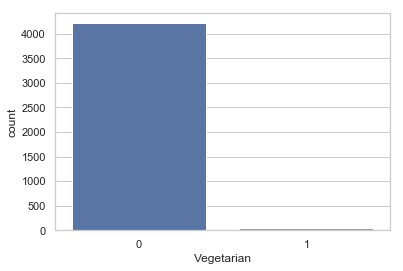

<Figure size 432x288 with 0 Axes>

In [272]:
sns.countplot(x='Vegetarian', data = final_df)
plt.show()
plt.savefig('count_plot')

In [274]:
count_no_sub = len(final_df[final_df['Vegetarian']==0])
count_sub = len(final_df[final_df['Vegetarian']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no vegetarian is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of vegetarian", pct_of_sub*100)

percentage of no vegetarian is 98.96616541353383
percentage of vegetarian 1.0338345864661653


In [275]:
final_df.groupby('Vegetarian').mean()

,Restaurants,Offices,Transport,Retail,Residential,Nightlife,Entertainment,Venues
Vegetarian,,,,,,,,
0,26.438984,2.407645,0.773029,10.840931,0.823599,2.848765,4.898623,61.372507
1,34.659091,2.931818,0.500000,15.022727,1.090909,5.454545,6.795455,87.750000


# Predict Vegetarian Restraunts by Neighborhood Characteristics

In [276]:
import statsmodels.api as sm

In [279]:
cols = ['Restaurants', 'Offices', 'Transport', 'Retail', 'Residential', 'Nightlife', 'Entertainment','Venues']
y = final_df['Vegetarian']
X = final_df[cols]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.091020
         Iterations 10
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.582  
Dependent Variable: Vegetarian       AIC:              790.7662
Date:               2019-04-05 22:43 BIC:              841.6149
No. Observations:   4256             Log-Likelihood:   -387.38 
Df Model:           7                LL-Null:          -244.94 
Df Residuals:       4248             LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     10.0000                                    
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Restaurants     -0.2512   0.0291 -8.6398 0.0000 -0.3082 -0.1942
Offices         -0.3482   0.0941 -3.7021 0.0002 -0.5326 -0.1639
Transport       -1.6090   

Remove Insignificant Predictors

In [280]:
cols = ['Restaurants', 'Offices', 'Transport', 'Retail', 'Nightlife', 'Entertainment','Venues']
y = final_df['Vegetarian']
X = final_df[cols]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.091065
         Iterations 10
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.582  
Dependent Variable: Vegetarian       AIC:              789.1479
Date:               2019-04-05 22:44 BIC:              833.6405
No. Observations:   4256             Log-Likelihood:   -387.57 
Df Model:           6                LL-Null:          -244.94 
Df Residuals:       4249             LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     10.0000                                    
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Restaurants     -0.2560   0.0280 -9.1561 0.0000 -0.3108 -0.2012
Offices         -0.3449   0.0938 -3.6762 0.0002 -0.5288 -0.1610
Transport       -1.6084   

# Fit Logistic Regression Model

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\katew\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [284]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [285]:
# Confusion Matrix

In [286]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1265    0]
 [  12    0]]


# Compute Precision, Recall, F-measure and Support

In [288]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1265
           1       0.00      0.00      0.00        12

   micro avg       0.99      0.99      0.99      1277
   macro avg       0.50      0.50      0.50      1277
weighted avg       0.98      0.99      0.99      1277



C:\Users\katew\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katew\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katew\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# ROC Curve

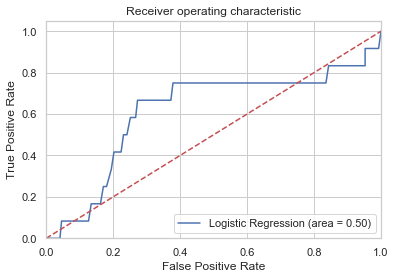

In [289]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()